# Plotting Fractals

![Fractal picture](tutorial-plotting-fractals/fractal.png)

Fractals are beautiful, compelling mathematical forms that can be oftentimes created from a relatively simple set of instructions. In nature they can be found in various places, such as coastlines, seashells, and ferns, and even were used in creating certain types of antennas. The mathematical idea of fractals was known for quite some time, but they really began to be truly appreciated in the 1970's as advancements in computer graphics and some accidental discoveries lead researchers like [Benoît Mandelbrot](https://en.wikipedia.org/wiki/Benoit_Mandelbrot) to stumble upon the truly mystifying visualizations that fractals possess.

Today we will learn how to plot these beautiful visualizations and will start to do a bit of exploring for ourselves as we gain familiarity of the mathematics behind fractals and will use the ever powerful NumPy universal functions to perform the necessary calculations efficiently.

## What you'll do

- Write a function for plotting various Julia sets
- Create a visualization of the Mandelbrot set
- Write a function that computes Newton fractals
- Experiment with variations of general fractal types

## What you'll learn

- A better intuition for how fractals work mathematically
- A basic understanding about NumPy universal functions and Boolean Indexing
- The basics of working with complex numbers in NumPy
- How to create your own unique fractal visualizations

## What you'll need

- [Matplotlib](https://matplotlib.org/)
- `make_axis_locatable` function from mpl_toolkits API

which can be imported as follows:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

- Some familiarity with Python, NumPy and matplotlib
- An idea of elementary mathematical functions, such as [exponents](https://en.wikipedia.org/wiki/Exponential_function), [sin](https://en.wikipedia.org/wiki/Sine), [polynomials](https://en.wikipedia.org/wiki/Polynomial) etc
- A very basic understanding of [complex numbers](https://en.wikipedia.org/wiki/Complex_number) would be useful
- Knowledge of [derivatives](https://en.wikipedia.org/wiki/Derivative) may be helpful

## Warmup

To gain some intuition for what fractals are, we will begin with an example.

Consider the following equation:

$f(z) = z^2 -1 $

where `z` is a complex number (i.e of the form $a + bi$ )

For our convenience, we will write a Python function for it

In [2]:
def f(z):
    return np.square(z) - 1

Note that the square function we used is an example of a **[NumPy universal function](https://numpy.org/doc/stable/reference/ufuncs.html)**; we will come back to the significance of this decision shortly.

To gain some intuition for the behaviour of the function, we can try plugging in some different values.

For $z = 0$, we would expect to get $-1$:

In [3]:
f(0)

-1

Since we used a universal function in our design, we can compute multiple inputs at the same time:

In [4]:
z = [4, 1-0.2j, 1.6]
f(z)

array([15.  +0.j , -0.04-0.4j,  1.56+0.j ])

Some values grow, some values shrink, some don't experience much change.

To see the behaviour of the function on a larger scale, we can apply the function to a subset of the complex plane and plot the result. To create our subset (or mesh), we can make use of the [**meshgrid**](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) function.

In [5]:
x, y = np.meshgrid(np.linspace(-10, 10, 20), np.linspace(-10, 10, 20))
mesh = x + (1j * y)  # Make mesh of complex plane

Now we will apply our function to each value contained in the mesh. Since we used a universal function in our design, this means that we can pass in the entire mesh all at once. This is extremely convenient for two reasons: It reduces the amount of code needed to be written and greatly increases the efficiency (as universal functions make use of system level C programming in their computations).


Here we plot the absolute value (or modulus) of each element in the mesh after one “iteration” of the function using a [**3D scatterplot**](https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html#scatter-plots):

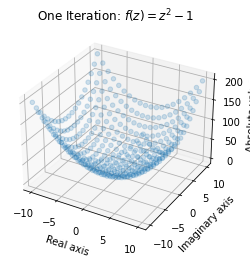

In [7]:
output = np.abs(f(mesh))  # Take the absolute value of the output (for plotting)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(x, y, output, alpha=0.2)

ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')
ax.set_zlabel('Absolute value')
ax.set_title('One Iteration: $ f(z) = z^2 - 1$');

This gives us a rough idea of what one iteration of the function does. Certain areas (notably in the areas closest to $(0,0i)$) remain rather small while other areas grow quite considerably. Note that we lose information about the output by taking the absolute value, but it is the only way for us to be able to make a plot.

Let’s see what happens when we apply 2 iterations to the mesh:

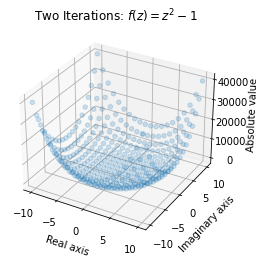

In [8]:
output = np.abs(f(f(mesh)))

ax = plt.axes(projection='3d')

ax.scatter(x, y, output, alpha=0.2)

ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')
ax.set_zlabel('Absolute value')
ax.set_title('Two Iterations: $ f(z) = z^2 - 1$');

Once again, we see that values around the origin remain small, and values with a larger absolute value (or modulus) “explode”.

From first impression, its behaviour appears to be normal, and may even seem mundane. Fractals tend to have more to them then what meets the eye; the exotic behavior shows itself when we begin applying more iterations.

Consider three complex numbers:

$z_1 = 0.4 + 0.4i $,

$z_2 = z_1 + 0.1$,

$z_3 = z_1 + 0.1i$

Given the shape of our first two plots, we would expect that these values would remain near the origin as we apply iterations to them. Let us see what happens when we apply 10 iterations to each value:

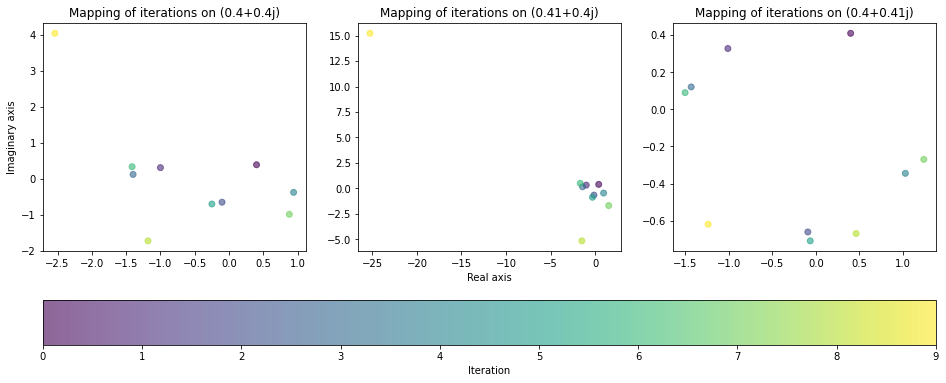

In [9]:
selected_values = np.array([0.4 + 0.4j, 0.41 + 0.4j, 0.4 + 0.41j])
num_iter = 9

outputs = np.zeros((num_iter+1, selected_values.shape[0]), dtype=complex)
outputs[0] = selected_values

for i in range(num_iter):
    outputs[i+1] = f(outputs[i])  # Apply 10 iterations, save each output

fig, axes = plt.subplots(1, selected_values.shape[0], figsize=(16, 6))
axes[1].set_xlabel('Real axis')
axes[0].set_ylabel('Imaginary axis')

for ax, data in zip(axes, outputs.T):
    cycle = ax.scatter(data.real, data.imag, c=range(data.shape[0]), alpha=0.6)
    ax.set_title(f'Mapping of iterations on {data[0]}')

fig.colorbar(cycle, ax=axes, location="bottom", label='Iteration');

To our surprise, the behaviour of the function did not come close to matching our hypothesis. This is a prime example of the chaotic behaviour fractals possess. In the first two plots, the value "exploded" on the last iteration, jumping way beyond the region that it was contained in previously. The third plot on the other hand remained bounded to a small region close to the origin, yielding completely different behaviour despite the tiny change in value.

This leads us to an extremely important question: **How many iterations can be applied to each value before they diverge (“explode”)?**

As we saw from the first two plots, the further the values were from the origin, the faster they generally exploded. Although the behaviour is uncertain for smaller values (like $z_1, z_2, z_3$), we can assume that if a value surpasses a certain distance from the origin (say 2) that it is doomed to diverge. We will call this threshold the **radius**.

This allows us to quantify the behaviour of the function for a particular value without having to perform as many computations. Once the radius is surpassed, we are allowed to stop iterating, which gives us a way of answering the question we posed. If we tally how many computations were applied before divergence, we gain insight into the behaviour of the function that would be hard to keep track of otherwise.

Of course, we can do much better and design a function that performs the procedure on an entire mesh.

In [10]:
def divergence_rate(mesh, num_iter=10, radius=2):

    z = mesh.copy()
    diverge_len = np.zeros(mesh.shape)  # Keep tally of the number of iterations

    # Iterate on element if and only if |element| < radius (Otherwise assume divergence)
    for i in range(num_iter):
        conv_mask = np.abs(z) < radius
        diverge_len[conv_mask] += 1
        z[conv_mask] = f(z[conv_mask])

    return diverge_len

The behaviour of this function may look confusing at first glance, so it will help to explain some of the notation.

Our goal is to iterate over each value in the mesh and to tally the number of iterations before the value diverges. Since some values will diverge quicker than others, we need a procedure that only iterates over values that have an absolute value that is sufficiently small enough. We also want to stop tallying values once they surpass the radius. For this, we can use **[Boolean Indexing](https://numpy.org/devdocs/reference/arrays.indexing.html#boolean-array-indexing)**, a NumPy feature that when paired with universal functions is unbeatable. Boolean Indexing allows for operations to be performed conditionally on a NumPy array without having to resort to looping over and checking for each array value individually.

In our case, we use a loop to apply iterations to our function $f(z) = z^2 -1 $ and keep tally. Using Boolean indexing, we only apply the iterations to values that have an absolute value less than 2.

With that out of the way, we can go about plotting our first fractal! We will use the [**imshow**](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) function to create a colour-coded visualization of the tallies.

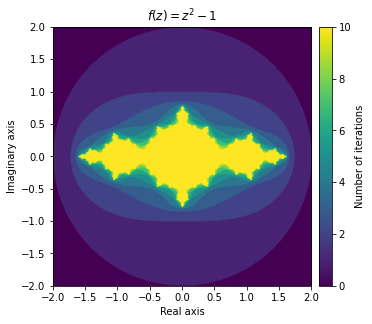

In [11]:
x, y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
mesh = x + (1j * y)

output = divergence_rate(mesh)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()

ax.set_title('$f(z) = z^2 -1$')
ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')

im = ax.imshow(output, extent=[-2, 2, -2, 2])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax, label='Number of iterations');

What this stunning visual conveys is the complexity of the function’s behaviour. The yellow region represents values that remain small, while the purple region represents the divergent values. The beautiful pattern that arises on the border of the converging and diverging values is even more fascinating when you realize that it is created from such a simple function.

## Julia set

What we just explored was an example of a fractal visualization of a specific Julia Set.

Consider the function $f(z) = z^2 + c$ where $c$ is a complex number. The **filled-in Julia set** of $c$ is the set of all complex numbers `z` in which the function converges at $f(z)$. Likewise, the boundary of the filled-in Julia set is what we call the **Julia set**. In our above visualization, we can see that the yellow region represents an approximation of the filled-in Julia set for $c = -1$ and the greenish-yellow border would contain the Julia set.

To gain access to a wider range of "Julia fractals", we can write a function that allows for different values of $c$ to be passed in:

In [12]:
def julia(mesh, c=-1, num_iter=10, radius=2):

    z = mesh.copy()
    diverge_len = np.zeros(z.shape)

    for i in range(num_iter):
        conv_mask = np.abs(z) < radius
        z[conv_mask] = np.square(z[conv_mask]) + c
        diverge_len[conv_mask] += 1

    return diverge_len

To make our lives easier, we will create a couple meshes that we will reuse throughout the rest of the examples:

In [13]:
x, y = np.meshgrid(np.linspace(-1, 1, 400), np.linspace(-1, 1, 400))
small_mesh = x + (1j * y)

x, y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
mesh = x + (1j * y)

## Upload to Domain Node

In [39]:
from syft import Worker, Dataset, Asset
from syft.client.client import SyftClient

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /home/e/PycharmProjects/PySyft/notebooks


In [40]:
w = Worker()
client = SyftClient.from_node(w).login(email="info@openmined.org", password="changethis")

In [41]:
dataset = Dataset(
    name="Fractals", 
    description="Grid to visualize fractals"
)

In [42]:
fractal_grid = Asset(
    name=f"Fractal Grid", 
    data=mesh, 
    mock=mesh, 
    mock_is_real=True,
    description="Grid to visualize fractals"
)

In [43]:
dataset.add_asset(fractal_grid)

In [44]:
dataset

```python
Syft Dataset: Fractals
Assets:
	Fractal Grid: Grid to visualize fractals
Description: Grid to visualize fractals

```

In [45]:
client.upload_dataset(dataset)

  0%|                                                     | 0/1 [00:00<?, ?it/s]


Uploading: Fractal Grid


ArrowNotImplementedError: Unsupported numpy type 15

## Continuing On

We will also write a function that we will use to create our fractal plots:

In [14]:
def plot_fractal(fractal, title='Fractal', figsize=(6, 6), cmap='rainbow', extent=[-2, 2, -2, 2]):

    plt.figure(figsize=figsize)
    ax = plt.axes()

    ax.set_title(f'${title}$')
    ax.set_xlabel('Real axis')
    ax.set_ylabel('Imaginary axis')

    im = ax.imshow(fractal, extent=extent, cmap=cmap)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    plt.colorbar(im, cax=cax, label='Number of iterations')

Using our newly defined functions, we can make a quick plot of the first fractal again:

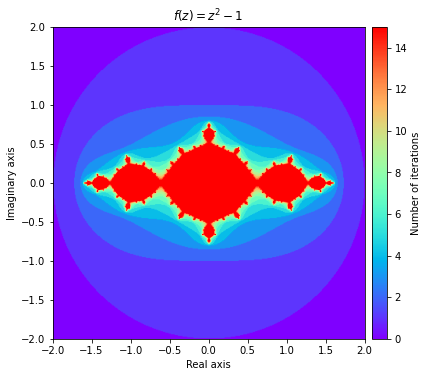

In [15]:
output = julia(mesh, num_iter=15)
kwargs = {'title': 'f(z) = z^2 -1'}

plot_fractal(output, **kwargs);

We also can explore some different Julia sets by experimenting with different values of $c$. It can be surprising how much influence it has on the shape of the fractal.

For example, setting $c = \frac{\pi}{10}$ gives us a very elegant cloud shape, while setting c = $-\frac{3}{4} + 0.4i$ yields a completely different pattern.

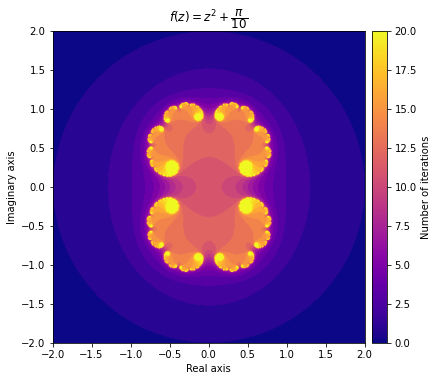

In [16]:
output = julia(mesh, c=np.pi/10, num_iter=20)
kwargs = {'title': 'f(z) = z^2 + \dfrac{\pi}{10}', 'cmap': 'plasma'}

plot_fractal(output, **kwargs);

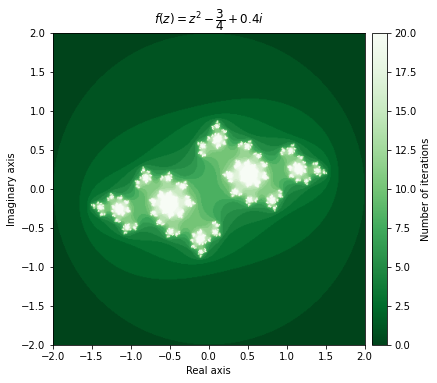

In [17]:
output = julia(mesh, c=-0.75 + 0.4j, num_iter=20)
kwargs = {'title': 'f(z) = z^2 - \dfrac{3}{4} + 0.4i', 'cmap': 'Greens_r'}

plot_fractal(output, **kwargs);

## Mandelbrot set

Closely related to the Julia set is the famous **Mandelbrot set**, which has a slightly different definition. Once again, we define $f(z) = z^2 + c$ where $c$ is a complex number, but this time our focus is on our choice of $c$. We say that $c$ is an element of the Mandelbrot set if f converges at $z = 0$. An equivalent definition is to say that $c$ is an element of the Mandelbrot set if $f(c)$ can be iterated infinitely and not 'explode'. We will tweak our Julia function slightly (and rename it appropriately) so that we can plot a visualization of the Mandelbrot set, which possesses an elegant fractal pattern.

In [18]:
def mandelbrot(mesh, num_iter=10, radius=2):

    c = mesh.copy()
    z = np.zeros(mesh.shape, dtype=np.complex128)
    diverge_len = np.zeros(z.shape)

    for i in range(num_iter):
        conv_mask = np.abs(z) < radius
        z[conv_mask] = np.square(z[conv_mask]) + c[conv_mask]
        diverge_len[conv_mask] += 1

    return diverge_len

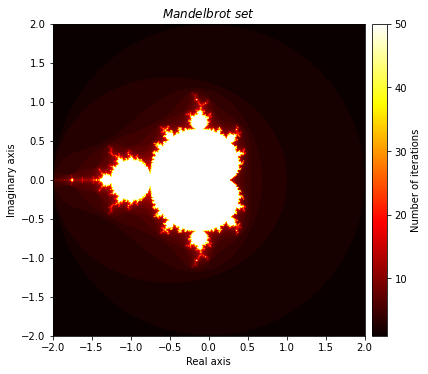

In [19]:
output = mandelbrot(mesh, num_iter=50)
kwargs = {'title': 'Mandelbrot \ set', 'cmap': 'hot'}

plot_fractal(output, **kwargs);

## Generalizing the Julia set

We can generalize our Julia function even further by giving it a parameter for which universal function we would like to pass in. This would allow us to plot fractals of the form $f(z) = g(z) + c$ where g is a universal function selected by us.

In [20]:
def general_julia(mesh, c=-1, f=np.square, num_iter=100, radius=2):

    z = mesh.copy()
    diverge_len = np.zeros(z.shape)

    for i in range(num_iter):
        conv_mask = np.abs(z) < radius
        z[conv_mask] = f(z[conv_mask]) + c
        diverge_len[conv_mask] += 1

    return diverge_len

One cool set of fractals that can be plotted using our general Julia function are ones of the form $f(z) = z^n + c$ for some positive integer $n$. A very cool pattern which emerges is that the number of regions that 'stick out' matches the degree in which we raise the function to while iterating over it.

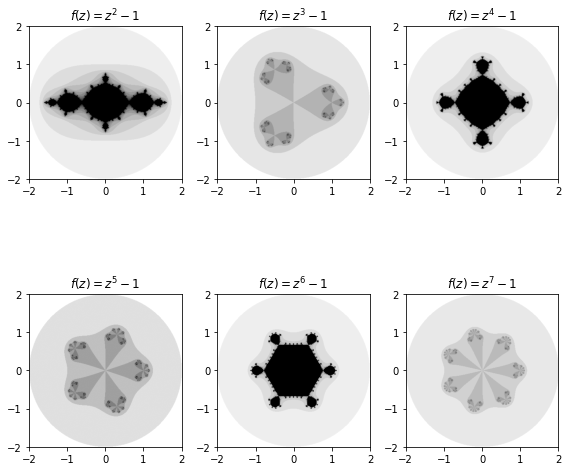

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(8, 8))
base_degree = 2

for deg, ax in enumerate(axes.ravel()):
    degree = base_degree + deg
    power = lambda z: np.power(z, degree)  # Create power function for current degree

    diverge_len = general_julia(mesh, f=power, num_iter=15)
    ax.imshow(diverge_len, extent=[-2, 2, -2, 2], cmap='binary')
    ax.set_title(f'$f(z) = z^{degree} -1$')

fig.tight_layout();

Needless to say, there is a large amount of exploring that can be done by fiddling with the inputted function, value of $c$, number of iterations, radius and even the density of the mesh and choice of colours.

### Newton Fractals

Newton fractals are a specific class of fractals, where iterations involve adding or subtracting the ratio of a function (often a polynomial) and its derivative to the input values. Mathematically, it can be expressed as:

$z := z - \frac{f(z)}{f'(z)}$

We will define a general version of the fractal which will allow for different variations to be plotted by passing in our functions of choice.

In [22]:
def newton_fractal(mesh, f, df, num_iter=10, r=2):

    z = mesh.copy()
    diverge_len = np.zeros(z.shape)

    for i in range(num_iter):
        conv_mask = np.abs(z) < r
        pz = f(z[conv_mask])
        dp = df(z[conv_mask])
        z[conv_mask] = z[conv_mask] - pz/dp
        diverge_len[conv_mask] += 1

    return diverge_len

Now we can experiment with some different functions. For polynomials, we can create our plots quite effortlessly using the [NumPy Polynomial class](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.html), which has built in functionality for computing derivatives.

For example, let's try a higher-degree polynomial:

In [23]:
p = np.polynomial.Polynomial([-16, 0, 0, 0, 15, 0, 0, 0, 1])
p

Polynomial([-16.,   0.,   0.,   0.,  15.,   0.,   0.,   0.,   1.], domain=[-1,  1], window=[-1,  1], symbol='x')

which has the derivative:

In [24]:
p.deriv()

Polynomial([ 0.,  0.,  0., 60.,  0.,  0.,  0.,  8.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

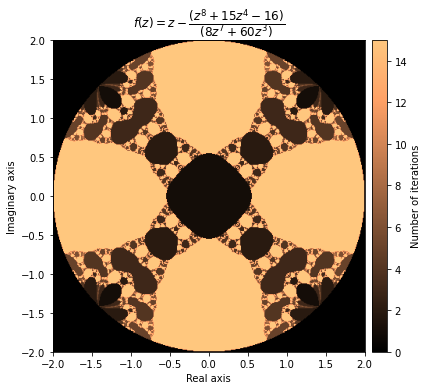

In [25]:
output = newton_fractal(mesh, p, p.deriv(), num_iter=15, r=2)
kwargs = {'title': 'f(z) = z - \dfrac{(z^8 + 15z^4 - 16)}{(8z^7 + 60z^3)}', 'cmap': 'copper'}

plot_fractal(output, **kwargs)

Beautiful! Let's try another one:

f(z) = $tan^2(z)$

$\frac{df}{dz} = 2 \cdot tan(z) sec^2(z) =\frac{2 \cdot tan(z)}{cos^2(z)}$

This makes $\frac{f(z)}{f'(z)} =  tan^2(z) \cdot \frac{cos^2(z)}{2 \cdot tan(z)} = \frac{tan(z)\cdot cos^2(z)}{2} = \frac{sin(z)\cdot cos(z)}{2}$

In [26]:
def f_tan(z):
    return np.square(np.tan(z))


def d_tan(z):
    return 2*np.tan(z) / np.square(np.cos(z))

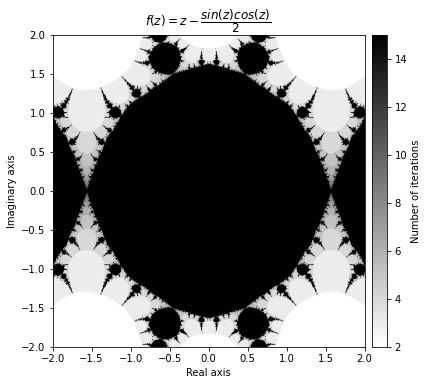

In [27]:
output = newton_fractal(mesh, f_tan, d_tan, num_iter=15, r=50)
kwargs = {'title': 'f(z) = z - \dfrac{sin(z)cos(z)}{2}', 'cmap': 'binary'}

plot_fractal(output, **kwargs);

Note that you sometimes have to play with the radius in order to get a neat looking fractal.

Finally, we can go a little bit wild with our function selection

$f(z) = \sum_{i=1}^{10} sin^i(z)$

$\frac{df}{dz} = \sum_{i=1}^{10} i \cdot sin^{i-1}(z) \cdot cos(z)$

In [28]:
def sin_sum(z, n=10):
    total = np.zeros(z.size, dtype=z.dtype)
    for i in range(1, n+1):
        total += np.power(np.sin(z), i)
    return total


def d_sin_sum(z, n=10):
    total = np.zeros(z.size, dtype=z.dtype)
    for i in range(1, n+1):
        total += i * np.power(np.sin(z), i-1) * np.cos(z)
    return total

We will denote this one 'Wacky fractal', as its equation would not be fun to try and put in the title.

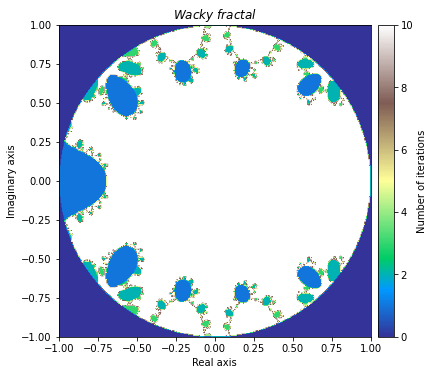

In [29]:
output = newton_fractal(small_mesh, sin_sum, d_sin_sum, num_iter=10, r=1)
kwargs = {'title': 'Wacky \ fractal', 'figsize': (6, 6), 'extent': [-1, 1, -1, 1], 'cmap': 'terrain'}

plot_fractal(output, **kwargs)

It is truly fascinating how distinct yet similar these fractals are with each other. This leads us to the final section.

## Creating your own fractals


What makes fractals more exciting is how much there is to explore once you become familiar with the basics. Now we will wrap up our tutorial by exploring some of the different ways one can experiment in creating unique fractals. I encourage you to try some things out on your own (if you have not done so already).

One of the first places to experiment would be with the function for the generalized Julia set, where we can try passing in different functions as parameters.

Let's start by choosing

$f(z) = tan(z^2)$

In [30]:
def f(z):
    return np.tan(np.square(z))

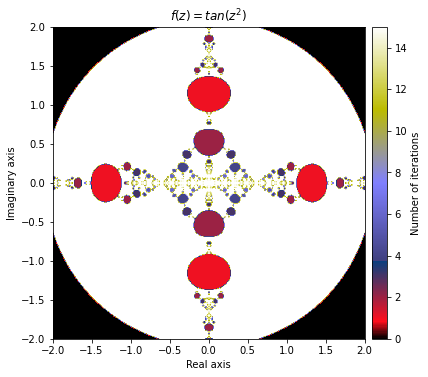

In [31]:
output = general_julia(mesh, f=f, num_iter=15, radius=2.1)
kwargs = {'title': 'f(z) = tan(z^2)', 'cmap': 'gist_stern'}

plot_fractal(output, **kwargs);

What happens if we compose our defined function inside of a sine function?

Let's try defining

$g(z) = sin(f(z)) = sin(tan(z^2))$

In [32]:
def g(z):
    return np.sin(f(z))

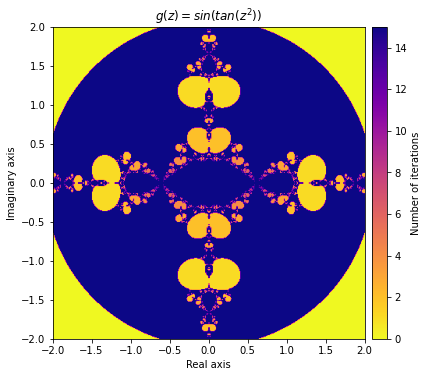

In [33]:
output = general_julia(mesh, f=g, num_iter=15, radius=2.1)
kwargs = {'title': 'g(z) = sin(tan(z^2))', 'cmap': 'plasma_r'}

plot_fractal(output, **kwargs);

Next, let's create a function that applies both f and g to the inputs each iteration and adds the result together:

$h(z) = f(z) + g(z) = tan(z^2) + sin(tan(z^2))$

In [34]:
def h(z):
    return f(z) + g(z)

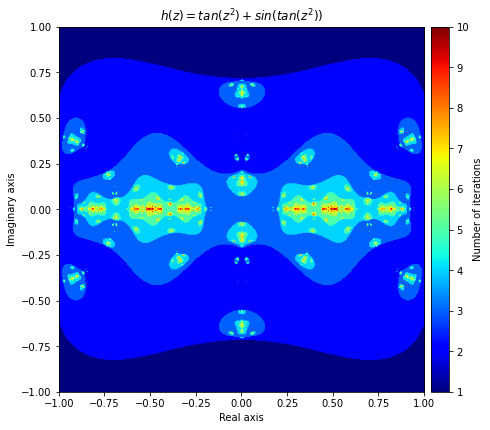

In [35]:
output = general_julia(small_mesh, f=h, num_iter=10, radius=2.1)
kwargs = {'title': 'h(z) = tan(z^2) + sin(tan(z^2))', 'figsize': (7, 7), 'extent': [-1, 1, -1, 1], 'cmap': 'jet'}

plot_fractal(output, **kwargs);

You can even create beautiful fractals through your own errors. Here is one that got created accidently by making a mistake in computing the derivative of a Newton fractal:

In [36]:
def accident(z):
    return z - (2 * np.power(np.tan(z), 2) / (np.sin(z) * np.cos(z)))

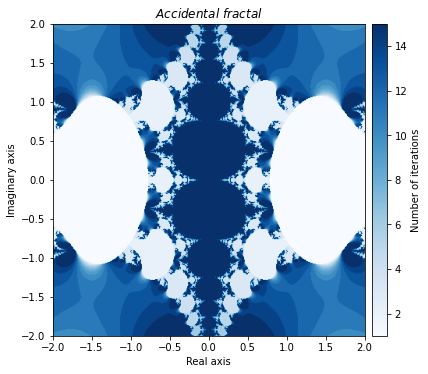

In [37]:
output = general_julia(mesh, f=accident, num_iter=15, c=0, radius=np.pi)
kwargs = {'title': 'Accidental \ fractal', 'cmap': 'Blues'}

plot_fractal(output, **kwargs);

Needless to say, there are a nearly endless supply of interesting fractal creations that can be made just by playing around with various combinations of NumPy universal functions and by tinkering with the parameters.

## In conclusion

We learned a lot about generating fractals today. We saw how complicated fractals requiring many iterations could be computed efficiently using universal functions. We also took advantage of boolean indexing, which allowed for less computations to be made without having to individually verify each value. Finally, we learned a lot about fractals themselves. As a recap:

- Fractal images are created by iterating a function over a set of values, and keeping tally of how long it takes for each value to pass a certain threshold
- The colours in the image correspond to the tally counts of the values
- The filled-in Julia set for $c$ consists of all complex numbers `z` in which $f(z) = z^2 + c$ converges
- The Julia set for $c$ is the set of complex numbers that make up the boundary of the filled-in Julia set
- The Mandelbrot set is all values $c$ in which $f(z) = z^2 + c$ converges at 0
- Newton fractals use functions of the form $f(z) = z - \frac{p(z)}{p'(z)}$
- The fractal images can vary as you adjust the number of iterations, radius of convergence, mesh size, colours, function choice and parameter choice

## On your own

- Play around with the parameters of the generalized Julia set function, try playing with the constant value, number of iterations, function choice, radius, and colour choice.

- Visit the “List of fractals by Hausdorff dimension” Wikipedia page (linked in the Further reading section) and try writing a function for a fractal not mentioned in this tutorial.

## Further reading

- [More information on the theory behind fractals](https://en.wikipedia.org/wiki/Fractal)
- [Further reading on Julia sets](https://en.wikipedia.org/wiki/Julia_set)
- [More details about the Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set)
- [A more complete treatment of Newton Fractals](https://en.wikipedia.org/wiki/Newton_fractal)
- [A list of different fractals](https://en.wikipedia.org/wiki/List_of_fractals_by_Hausdorff_dimension)